In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=pd.read_csv("coord.csv")

In [3]:
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
X = df[['Latitude', 'Longitude']]


In [14]:
filtered_df = df[(df['Latitude'] >= 0) & (df['Latitude'] <= 20) & (df['Longitude'] >= 50) & (df['Longitude'] <= 150)]
X = filtered_df[['Latitude', 'Longitude']]

C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_158088\3730266721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.labels_


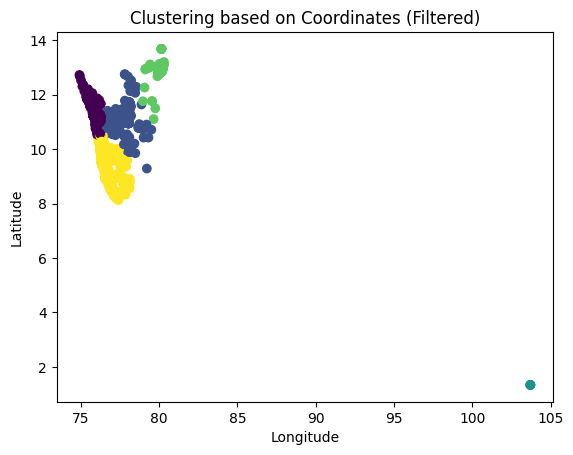

In [25]:

num_clusters =5


kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)


filtered_df['Cluster'] = kmeans.labels_


plt.scatter(filtered_df['Longitude'], filtered_df['Latitude'], c=filtered_df['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering based on Coordinates (Filtered)')
plt.show()


filtered_df.to_csv('filtered_clustered_coordinates.csv', index=False)

In [27]:
import folium

mean_latitude = filtered_df['Latitude'].mean()
mean_longitude = filtered_df['Longitude'].mean()
mymap = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)


cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']


for index, row in filtered_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  icon=folium.Icon(color=cluster_colors[row['Cluster']]),
                  popup=f'Cluster {row["Cluster"]}').add_to(mymap)


mymap.save('clustered_map-v1.html')